In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ibm/Flowers-Dataset/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ibm/Flowers-Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [72]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 62s 345ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 2/10
180/180 [==============================] - 62s 344ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 3/10
180/180 [==============================] - 62s 345ms/step - loss: 1.5988 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 4/10
180/180 [==============================] - 62s 343ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 5/10
180/180 [==============================] - 62s 344ms/step - loss: 1.5988 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 6/10
180/180 [==============================] - 62s 343ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437
Epoch 7/10
180/180 [==============================] - 62s 343ms/step - loss: 1.5987 - accuracy: 0.2437 - val_loss: 1.5985 - val_ac

In [77]:
model.save('IBM_flowers.h5')

In [78]:
pwd

'/content'

In [79]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [80]:
model=load_model('IBM_flowers.h5')

In [81]:
img=image.load_img(r'/content/drive/MyDrive/ibm/Flowers-Dataset/flowers/dandelion/10043234166_e6dd915111_n.jpg')


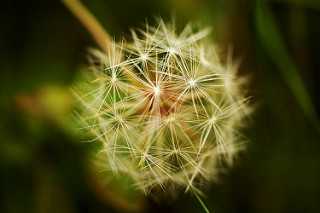

In [82]:
img

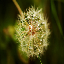

In [83]:
img=image.load_img(r'/content/drive/MyDrive/ibm/Flowers-Dataset/flowers/dandelion/10043234166_e6dd915111_n.jpg',target_size=(64,64))
img

In [84]:
x=image.img_to_array(img)
x

array([[[ 3.,  6.,  0.],
        [ 8.,  9.,  1.],
        [ 7.,  8.,  0.],
        ...,
        [35., 44.,  1.],
        [35., 44.,  1.],
        [35., 43.,  2.]],

       [[ 5.,  8.,  1.],
        [ 6.,  7.,  0.],
        [ 6.,  7.,  1.],
        ...,
        [30., 36.,  0.],
        [30., 38.,  0.],
        [31., 39.,  0.]],

       [[ 7.,  8.,  2.],
        [ 7.,  8.,  2.],
        [ 5.,  8.,  0.],
        ...,
        [19., 22.,  1.],
        [19., 24.,  1.],
        [23., 29.,  3.]],

       ...,

       [[17., 20.,  1.],
        [23., 27.,  2.],
        [24., 30.,  2.],
        ...,
        [23., 27.,  0.],
        [23., 29.,  1.],
        [21., 27.,  1.]],

       [[16., 19.,  0.],
        [23., 28.,  0.],
        [26., 31.,  1.],
        ...,
        [19., 23.,  0.],
        [25., 27.,  5.],
        [19., 24.,  1.]],

       [[17., 20.,  1.],
        [22., 26.,  0.],
        [26., 31.,  1.],
        ...,
        [18., 21.,  0.],
        [20., 24.,  1.],
        [21., 25.,  2.]]

In [85]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 3.,  6.,  0.],
         [ 8.,  9.,  1.],
         [ 7.,  8.,  0.],
         ...,
         [35., 44.,  1.],
         [35., 44.,  1.],
         [35., 43.,  2.]],

        [[ 5.,  8.,  1.],
         [ 6.,  7.,  0.],
         [ 6.,  7.,  1.],
         ...,
         [30., 36.,  0.],
         [30., 38.,  0.],
         [31., 39.,  0.]],

        [[ 7.,  8.,  2.],
         [ 7.,  8.,  2.],
         [ 5.,  8.,  0.],
         ...,
         [19., 22.,  1.],
         [19., 24.,  1.],
         [23., 29.,  3.]],

        ...,

        [[17., 20.,  1.],
         [23., 27.,  2.],
         [24., 30.,  2.],
         ...,
         [23., 27.,  0.],
         [23., 29.,  1.],
         [21., 27.,  1.]],

        [[16., 19.,  0.],
         [23., 28.,  0.],
         [26., 31.,  1.],
         ...,
         [19., 23.,  0.],
         [25., 27.,  5.],
         [19., 24.,  1.]],

        [[17., 20.,  1.],
         [22., 26.,  0.],
         [26., 31.,  1.],
         ...,
         [18., 21.,  0.],
        

In [86]:
y=np.argmax(model.predict(x),axis=1)
y

array([1])

In [87]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [88]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [89]:
index[y[0]]

'dandelion'